In [16]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
data_files = glob.glob("data/*csv")
data_files

['data/simulation_info_2022-11-16-20-41-44.csv',
 'data/simulation_info_2022-11-16-20-44-55.csv',
 'data/simulation_info_2022-11-16-20-48-08.csv',
 'data/simulation_info_2022-11-16-20-23-45.csv']

In [38]:
dfs = [pd.read_csv(data_files[i]) for i in range(len(data_files))]

In [39]:
df = pd.concat(dfs)
df

,Unnamed: 0,cross_length (um),cross_width (um),cross_gap (um),Lj (nH),Cj (fF),qubit_freq (GHz),ratio,alpha (MHz),w03 (GHz)
0,0,225,30,30,40,56.71,4.471150,27.771963,-588.584663,12.236280
0,0,225,30,30,20,127.48,4.471150,55.198051,-296.136385,12.821176
0,0,225,30,30,30,80.38,4.471150,36.942846,-442.471363,12.528506
0,0,225,30,30,10,268.38,4.439588,111.085755,-147.148942,4.145289


In [40]:
df["w03 (GHz)"] = (3*df["qubit_freq (GHz)"]*1e9 + 2*df["alpha (MHz)"]*1e6) / 1e9

In [41]:
df

,Unnamed: 0,cross_length (um),cross_width (um),cross_gap (um),Lj (nH),Cj (fF),qubit_freq (GHz),ratio,alpha (MHz),w03 (GHz)
0,0,225,30,30,40,56.71,4.471150,27.771963,-588.584663,12.236280
0,0,225,30,30,20,127.48,4.471150,55.198051,-296.136385,12.821176
0,0,225,30,30,30,80.38,4.471150,36.942846,-442.471363,12.528506
0,0,225,30,30,10,268.38,4.439588,111.085755,-147.148942,13.024465


<AxesSubplot: xlabel='Lj (nH)', ylabel='ratio'>

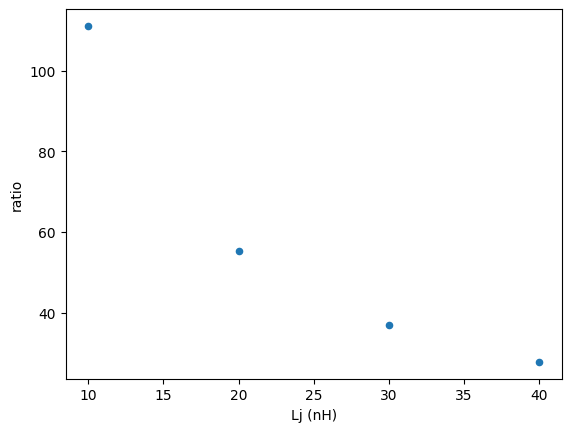

In [50]:
df.plot("Lj (nH)","ratio", kind="scatter",sharex=True)

<AxesSubplot: xlabel='Lj (nH)', ylabel='qubit_freq (GHz)'>

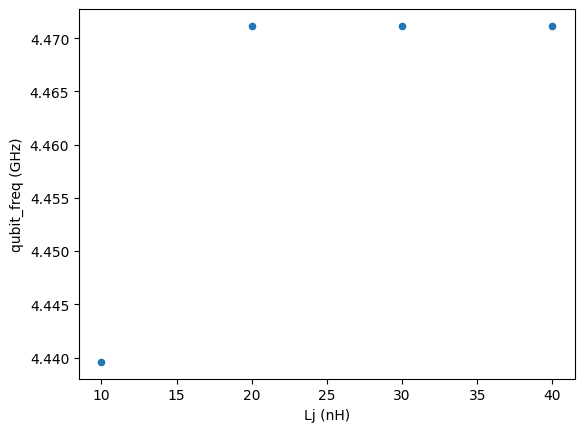

In [51]:
df.plot("Lj (nH)","qubit_freq (GHz)", kind="scatter",sharex=True)

In [52]:
4.471150 - 3

1.4711499999999997